Aliasing is a very important phenomenon which highly influences the digital signal processing area. It is tightly coupled with the notion of sampling and sampling rate. Let’s discuss it in detail!

# 📎 Aliasing definition

**Aliasing** is the effect of overlapping frequency components resulting from unsufficiently large sample rate. In other words, it causes appearance of frequencies in the amplitude-frequency spectrum, that are not in the original signal. How does it come to life?

# 📎 Sampling theorem revisited

We should recall the sampling theorem:

$$ f_{s} > 2f_{max} $$

where $f_{s}$ is the sampling rate (how many samples of a continuous signal we take per second) and $f_{max}$ is the highest frequency in the observed signal. If we sample the signal holding on to the above inequality, we are able to perfectly reconstruct the signal:

![](./public/image_dsp_02_1.png)

$Accurately sampled signal.$

Clearly the samples preserve the original shape of the signal.

What happens if $f_{s} = 2f_{max}$ ? Such a situation is depicted below:

![](./public/image_dsp_02_2.png)

$Signal sampled at the edge of reconstructibility.$

The sampled sinusoid is treated as a constant value; it can even become 0! So we clearly miss a part of the signal.

When we increase the maximum frequency $f_{max}$ (or equivalently: decrease the sampling rate $f_{s}$) we can observe the following:

![](public/image_dsp_02_3.png)

$Signal sampled at a too low rate to accurately reconstruct.$

The samples do not resemble the original signal and the information about it is lost. But we get **some** signal out of the sampling procedure. What is its frequency?

To learn the outcome of this operation we need to look at continuous and discrete signal spectra.

# 📎 Continuous vs discrete spectra

Having a continuous (analog) signal and being able to derive its continuous spectrum would enable us to see a situation similar as below:

![](public/image_dsp_02_4.png)

$Continuous spectrum of a continuous signal.$

The abscissa is equivalent to frequency $f$ and the ordinate to amplitude $|s_(f)|$ of particular frequency components. We can view a signal as a sum of its frequency components. The spectrum is even ($s(f) = s(-f)$), because values of the original signal are real ($s(t) \in \mathbb(R)$). We can clearly see, that there is some $f_{max}$ above which no frequency components are present.

(Note: according to the Heisenberg’s uncertainty principle the signal corresponding to the above spectrum should be infinite in time domain since the spectrum is finite in the frequency domain.)

(Note: examples of continuous signals that are not finite in the frequency domain are white noise and Dirac’s delta).

How does the spectrum of a sampled signal look? Well, it repeats itself every $f_{s}$ :

![](public/image_dsp_02_5.png)

Discrete spectrum of a discrete signal. Although not visible here, the spectrum is quantized in frequency as well.

Why is that? You can explain it intuitively that having a set of samples, you can always insert one or more periods of a sine between them and it would still get sampled the same way:

![](public/image_dsp_02_6.png)

Discrete nodes may be viewed as sampling a sine of frequency 0, $f_{s}$, 2$f_{s}$, etc.

If we do not know anything about the signal that was sampled, we cannot say what frequencies it originally had. But we generally (not always) assume that the frequencies in the original signal were between 0 and $\frac{f_{s}}{2}$ (we ignore negative frequencies as they have no physical meaning). Thus, during reconstruction, we restrict ourselves to these frequencies only.

# 📎 Aliased spectra

Now with aliasing $f_{max} > \frac{f_{s}}{2}$, so we could observe something like this:

![](public/image_dsp_02_7.png)

Aliasing: frequency components of multiplicated spectra overlap

The repeated spectra overlap and in the overlapping regions a permantent loss of signal information happens. That exactly is aliasing. Afterwards we cannot reconstruct the original signal anymore. Going back to our sine example: if the sampled sine had a frequency of
38
 kHz
38 kHz and we sampled it with
$f_{s}$=48kHz, due to spectra duplication we would get a reflected component at $ f = -10$kHz and at $ f = 10$kHz because the spectrum is even. It will be audible in the output and we shall demonstrate it below:

![](public/image_dsp_02_8.png)

Aliased frequency components: sine at 38 kHz appears at 10 kHz.

# 📎 How to avoid aliasing?

To avoid aliasing we can:

- ensure it is in the
[0, $\frac{f_{s}}{2}$) range (e.g. through low-pass filtering) or
- increase the sample rate.

This implies that we should know what range our signal is in before we sample it.

Remember: after aliasing creeped into the sampled signal, it is impossible to eliminate.

# 📎 Summary

Aliasing is the effect of new frequencies appearing in the sampled signal after reconstruction, that were not present in the original signal. It is caused by too low sample rate for sampling a particular signal or too high frequencies present in the signal for a particular sample rate. We can avoid it by using sufficiently large sample rate or low-pass filtering the signal before sampling to ensure the $f_{max}$ < $\frac{f_{s}}{2}$ condition.

# 📎 Sine aliasing code example

**The following code plays out three consecutive sines: at 100, 1000, 10 000 and 38 000 Hz and displays their spectra. You can hear, that the 38 kHz sine sampled at 48 kHz sounds exactly like 10 kHz: an effect of aliasing.**

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

In [94]:
# Plotting parameters
plt.rcParams.update({'font.size': 15})
xlim = [-15, 15]
stem_params = {'linefmt': 'C0-', 'markerfmt': 'C0o', 'basefmt': ' '}

In [95]:
def signal(A, f, t, phi=0.0):
    """
    :param A: amplitude
    :param f: frequency in Hz
    :param t: time in s
    :param phi: phase offset
    :return: sine with amplitude A at frequency f over time t
    """

    return A * np.sin(2 * np.pi * f * t + phi)

In [96]:
def normalized_dft(signal, n_fft, fs):
    """
    :param signal: signal to calculate DFT of
    :param n_fft: number of samples for Fast Fourier Transform
    :param fs: sample rate
    :return: discrete Fourier spectrum of the given signal normalized to highest amplitude of frequency components
    """

    dft = np.abs(np.fft.fft(signal[:n_fft]))
    dft /= np.amax(dft)
    frequencies = np.fft.fftfreq(len(dft), d=1 / fs)


    amplitude_threshold = 0.01
    nonzero_frequencies = [
        frequency for i, frequency in enumerate(frequencies) if dft[i] > amplitude_threshold
    ]
    nonzero_dft = [amplitude for amplitude in dft if amplitude > amplitude_threshold]


    return np.array(nonzero_dft), np.array(nonzero_frequencies)

In [97]:
# Signal Parameters
fs = 48000 # Sample rate, Hz
time_start = 0 # s
signal_duration = 1 # s
n_fft = int(0.01 * fs) # number of samples for DFT
t = np.arange(time_start, signal_duration, step=1/fs)

n_fft, t

(480,
 array([0.00000000e+00, 2.08333333e-05, 4.16666667e-05, ...,
        9.99937500e-01, 9.99958333e-01, 9.99979167e-01], shape=(48000,)))

In [98]:
# Hz to kHz conversion
divisor = 1000.0
fs_plot = fs / divisor

fs_plot

48.0

In [99]:
frequencies = [100, 1000, 10000, 38000]

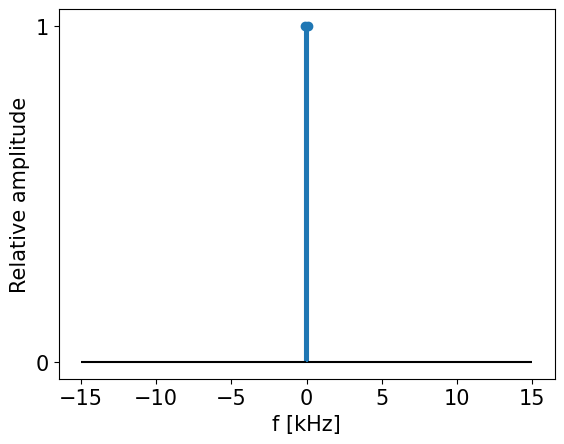

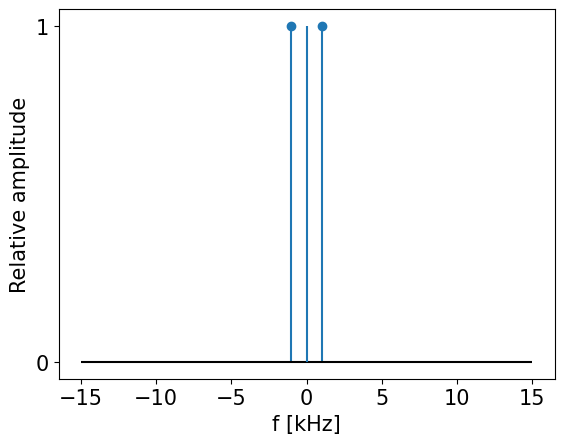

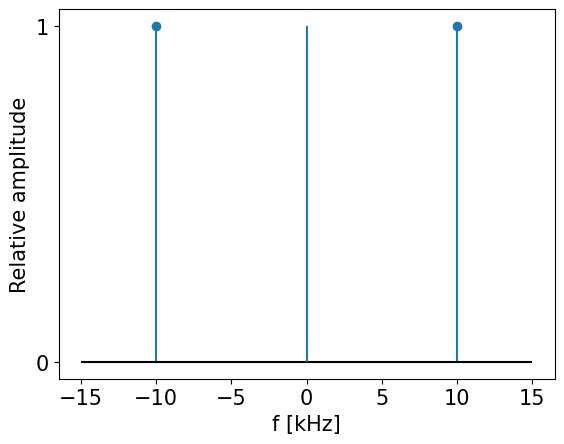

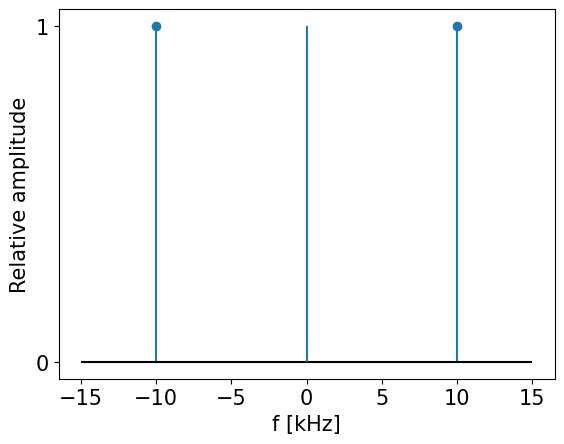

In [100]:
for f in frequencies:

    # Generation
    s_t = signal(1.0, f, t)

    # Discrete Fourier transform
    dft, frequencies = normalized_dft(s_t, n_fft, fs)

    # Scale
    frequencies_plot = frequencies / divisor

    # Playing
    attentuation = 0.3
    sd.play(attentuation * s_t, samplerate=fs)


    # Plotting
    plt.figure()
    plt.stem(frequencies_plot, dft, **stem_params)
    plt.hlines(xmin=xlim[0], xmax=xlim[1], y=0, colors='black')
    plt.vlines(0, 0, 1.0)
    plt.yticks([0, 1])
    plt.ylabel('Relative amplitude')
    plt.xlabel('f [kHz]')
    plt.show()